# Homework 5 (Dev Mody)
## Exercise 1 (Convolutional Networks - Vertical and Horizontal Art)

In order to better understand convolutional networks, we will, in this exercise, generate some toy images and then analyze them using a convolutional network.

Let us start by generating some images that contain a number `stripe_nr` of either horizontal or vertical stripes of random length at random positions. We can do that using the following function:

```python
def generate_stripe_image(size, stripe_nr, vertical = True):
    img=np.zeros((size,size,1),dtype="uint8")
    for i in range(0,stripe_nr):
        x,y = np.random.randint(0,size,2)
        l = np.int(np.random.randint(y,size,1))
        if (vertical):
            img[y:l,x,0]=255
        else:
            img[x,y:l,0]=255
    return img
```

You can have a look at the images generated by using:
```python
img = generate_stripe_image(50, 10, vertical=True)
plt.imshow(img[:, :, 0], cmp='gray')
```
Note that w'ere only using the first channel in this image. 

### Exercise 1.1: Dataset Generation

As in the example above, let us decide to work with 50×50 images each with 10 random
stripes. Use the above function to generate 1,000 training images and 1,000 validation images
`X_train`, `X_val`, each with exactly 500 images with horizonal stripes and 500 images with
vertical stripes. Normalize the two sets.

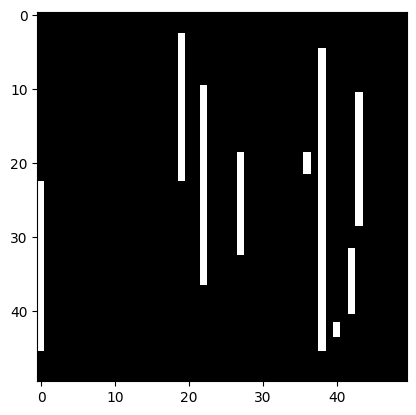

In [1]:
from autograd import numpy as np
import matplotlib.pyplot as plt

def generate_stripe_image(size, stripe_nr, vertical = True):
    img=np.zeros((size,size,1),dtype="uint8")
    for _ in range(0,stripe_nr):
        x,y = np.random.randint(0,size,2)
        l = np.int_(np.random.randint(y,size))
        if (vertical):
            img[y:l,x,0]=255
        else:
            img[x,y:l,0]=255
    return img

img=generate_stripe_image(50,10, vertical=True)
plt.imshow(img[:,:,0],cmap='gray')

In [4]:
def dataset_generation (size, stripe_nr, num_images, vertical):
    images = np.zeros((num_images, size, size, 1), dtype="float32")
    for i in range(num_images):
        images[i] = generate_stripe_image(size, stripe_nr, vertical) / 255.0
    return images

X_vert_train = dataset_generation(50, 10, 500, True)
X_horiz_train = dataset_generation(50, 10, 500, False)
X_train = np.concatenate((X_vert_train, X_horiz_train), axis=0)

X_vert_val = dataset_generation(50, 10, 500, True)
X_horiz_val = dataset_generation(50, 10, 500, False)
X_val = np.concatenate((X_vert_val, X_horiz_val), axis=0)


### Exercise 1.2: One-Hot Encoding

Create labels `Y_train` and `Y_val` with the correct labels for the training and validation images. For instance, use $0$ for images with vertical stripes and $1$ for images with horizontal stripes. In the following, we shall use one-hot encoding, so convert `Y_train` and `Y_val` to one-hot format using the TensorFlow/Keras function `tf.keras.utils.to_categorical`.

In [5]:
from tensorflow.keras.utils import to_categorical

Y_vert_train = np.zeros(500)
Y_horiz_train = np.ones(500)
Y_train = np.concatenate((Y_vert_train, Y_horiz_train))
Y_train = to_categorical(Y_train)

Y_vert_val = np.zeros(500)
Y_horiz_val = np.ones(500)
Y_val = np.concatenate((Y_vert_val, Y_horiz_val))
Y_val = to_categorical(Y_val)

### Exercise 1.3: Convolutional Network

Use TensorFlow/Keras to build a Convolutional Network with a few layers: a 5x5 kernel convolution layer with linear activation and a single filter, a max pooling 2D layer with `pool_size = 50` and a dense layer with 2 neurons activated with softmax. Compile it using:

```python
model.compile(loss=’categorical_crossentropy’, optimizer=’adam’, metrics=[’accuracy’])
```

How many parameters do you have?

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(kernel_size=(5,5), filters=1, input_shape=(50,50,1), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=50))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("The number of parameters in this model is: " + str(model.count_params()))

The number of parameters in this model is: 30


### Exercise 1.4: Training and Evaluation

We can now use the One-Hot Encoded Data to train the model. Let's do that using:

```python
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1, shuffle=True)
```

Plot the model and validation accuracy as a function of the epoch. Make another plot of the model and validation loss versus the epoch. These are accessible as for instance `history.history['val_loss']`.

Epoch 1/50


2025-03-26 22:01:18.813453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4813 - loss: 0.9133 - val_accuracy: 0.5000 - val_loss: 0.8087
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4896 - loss: 0.8110 - val_accuracy: 0.5000 - val_loss: 0.7360
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4927 - loss: 0.7331 - val_accuracy: 0.5000 - val_loss: 0.6811
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5001 - loss: 0.6728 - val_accuracy: 0.5000 - val_loss: 0.6401
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4977 - loss: 0.6364 - val_accuracy: 0.5000 - val_loss: 0.6086
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5239 - loss: 0.5812 - val_accuracy: 0.5000 - val_loss: 0.5837
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4899 - loss: 0.5855 - val_accuracy: 0.5000 - val_loss: 0.5631
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5196 - loss: 0.5444 - val_accuracy: 0.5000 - val_loss: 0.

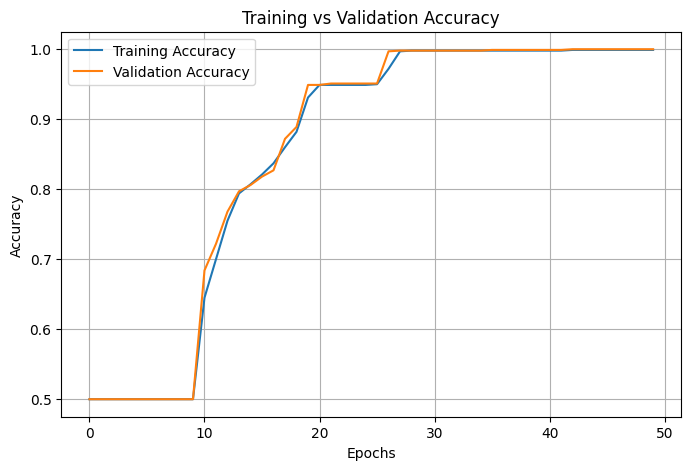

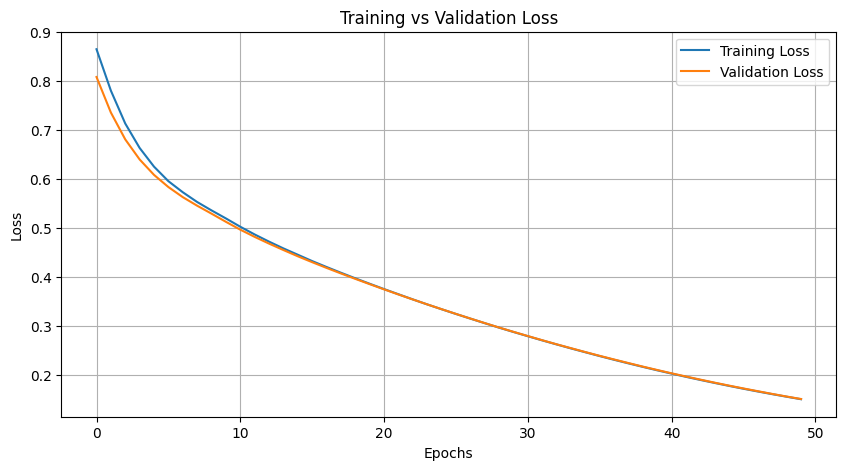

In [13]:
def plot_accuracy (history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss (history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1, shuffle=True)
plot_accuracy(history)
plot_loss(history)

### Exercise 1.5: Grey Scale Plot

If things are working correctly, the network should have found a kernel that correctly distinguishes between horizontal and vertical stripes. You can access the trained kernel using `my_kernel = model.get_weights()[0]`. Make a grey scale plot of the kernel. Comment on the visual appearance of the kernel. Does it seem reasonable that it is capable of distinguishing between horizontal and vertical stripes? Explain.

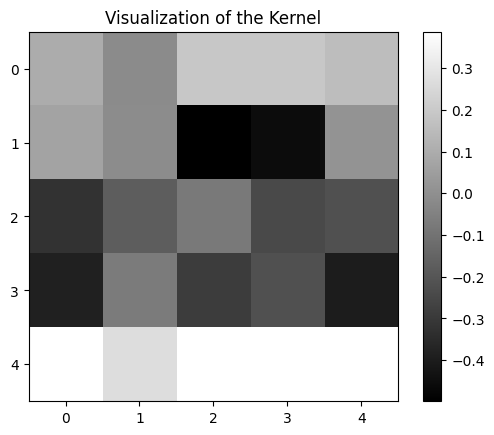

In [15]:
conv_filter = model.get_weights()[0]
kernel = conv_filter[:,:,0,0]
plt.imshow(kernel, cmap='gray')
plt.colorbar()
plt.title("Visualization of the Kernel")
plt.show()


The grayscale plot indicates the kernel’s ability to distinguish between vertical and horizontal stripes. A vertical band of higher weights would align with vertical stripes, yielding stronger activations when convolved, while producing weaker responses for horizontal stripes. Alternatively, a horizontal band would favor horizontal stripes. The clear directional bias and weight contrast, as shown by the colorbar, make it a reasonable feature detector for this task.

### Exercise 1.6: Model Experiments:

Experiment with your network. What happens if you use a ReLU activation instead of linear activation in the convolutions layer? What happens if you use average pooling instead of max pooling? What happens if you use a different kernel size?

We first experiment with using ReLU instead of Linear Activation as follows:

Epoch 1/50


/Users/devmody/Documents/Courses/3ml3/homeworks/homework5/hw5/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5101 - loss: 0.8611 - val_accuracy: 0.5000 - val_loss: 0.8350
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4994 - loss: 0.8261 - val_accuracy: 0.5000 - val_loss: 0.7936
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5055 - loss: 0.7800 - val_accuracy: 0.5000 - val_loss: 0.7602
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5077 - loss: 0.7485 - val_accuracy: 0.5000 - val_loss: 0.7318
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.7264 - val_accuracy: 0.5000 - val_loss: 0.7078
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4820 - loss: 0.7099 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4925 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6769
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4853 - loss: 0.6822 - val_accuracy: 0.5000 - val_loss: 0.

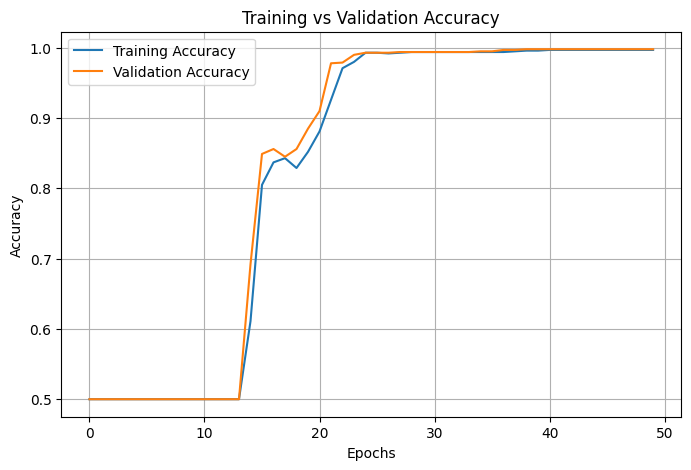

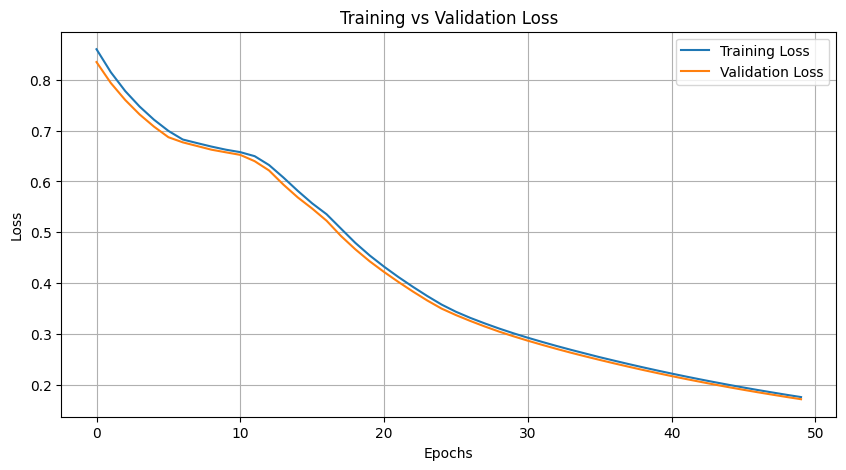

In [16]:
model = Sequential()
model.add(Conv2D(kernel_size=(5,5), filters=1, input_shape=(50,50,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=50))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1, shuffle=True)
plot_accuracy(history)
plot_loss(history)

Using ReLU in the 5x5 Convolution Layer increases training and validation accuracy faster, often exceeding 95% within 20 epochs, comapred to the linear activation's slower climb to ~90% by epoch 50. ReLU introduces non-linearity, allowing the network to learn complex patterns like stripe orientation more effectively. By outputting zero for negative values, it reduces noise from irrelevant features, enhancing the filter’s ability to detect vertical or horizontal stripes, unlike the linear activation, which passes all values unchanged.

Next, I perform the experiment of using Average Pooling instead of Max Pooling as follows:

Epoch 1/50


/Users/devmody/Documents/Courses/3ml3/homeworks/homework5/hw5/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5114 - loss: 0.6943 - val_accuracy: 0.5010 - val_loss: 0.6934
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5101 - loss: 0.6934 - val_accuracy: 0.5040 - val_loss: 0.6933
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5124 - loss: 0.6935 - val_accuracy: 0.5070 - val_loss: 0.6932
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5015 - loss: 0.6937 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5085 - loss: 0.6935 - val_accuracy: 0.4900 - val_loss: 0.6931
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4558 - loss: 0.6940 - val_accuracy: 0.4920 - val_loss: 0.6931
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4577 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4898 - loss: 0.6933 - val_accuracy: 0.4890 - val_loss: 0.

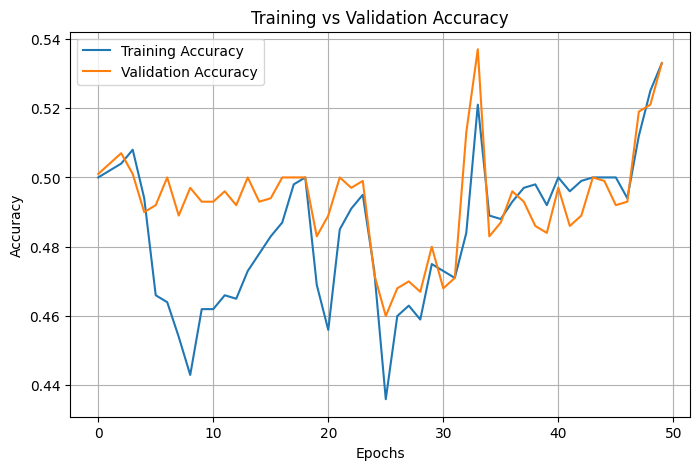

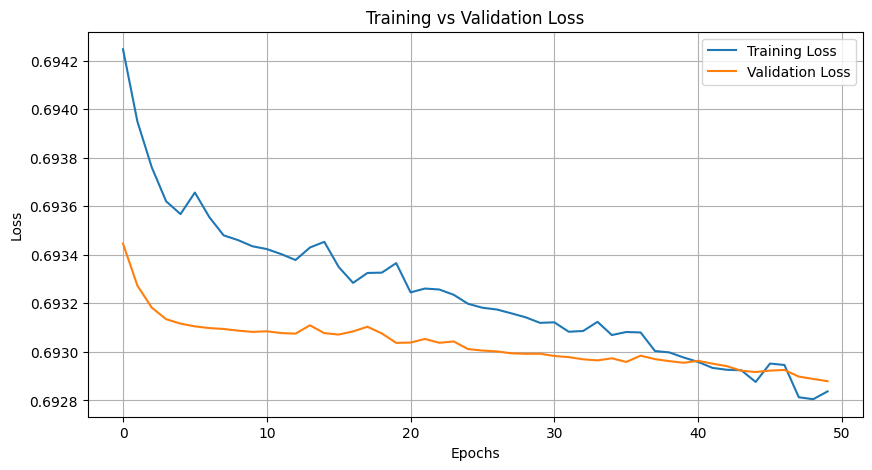

In [18]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()
model.add(Conv2D(kernel_size=(5,5), filters=1, input_shape=(50,50,1), activation='linear', padding='same'))
model.add(AveragePooling2D(pool_size=50))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1, shuffle=True)
plot_accuracy(history)
plot_loss(history)

Replacing `MaxPooling2D(pool_size=50)` with `AveragePooling2D` results in lower accuracy and slower convergence than Max Pooling. Average pooling computes the mean across the 50x50 feature map, diluting the strong activations critical for distinguishing stripe patterns. Max pooling, by contrast, preserves the highest activation (e.g., from aligned stripes), providing a clearer signal to the dense layer for classification.

Finally, I perform the experiment of using a different kernel size as follows (using a 3x3 kernel):

Epoch 1/50


/Users/devmody/Documents/Courses/3ml3/homeworks/homework5/hw5/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4810 - loss: 1.1324 - val_accuracy: 0.5000 - val_loss: 1.0276
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5056 - loss: 1.0113 - val_accuracy: 0.5000 - val_loss: 0.9558
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5067 - loss: 0.9401 - val_accuracy: 0.5000 - val_loss: 0.8900
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4806 - loss: 0.9175 - val_accuracy: 0.5000 - val_loss: 0.8290
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4985 - loss: 0.8198 - val_accuracy: 0.5000 - val_loss: 0.7762
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4906 - loss: 0.7794 - val_accuracy: 0.5000 - val_loss: 0.7279
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5092 - loss: 0.7111 - val_accuracy: 0.5000 - val_loss: 0.6863
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4959 - loss: 0.6813 - val_accuracy: 0.5000 - val_loss: 0.

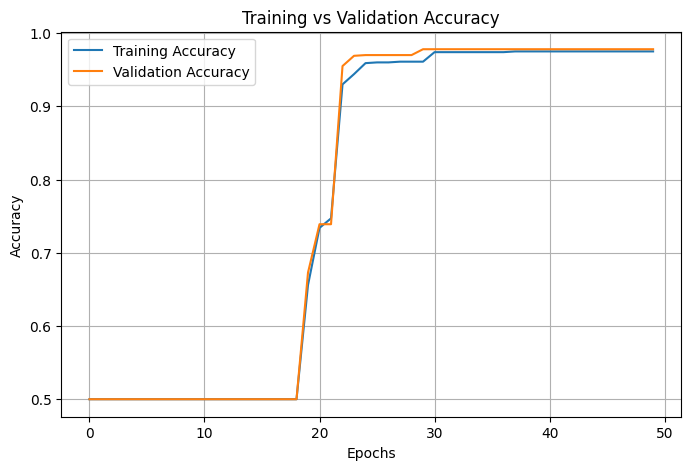

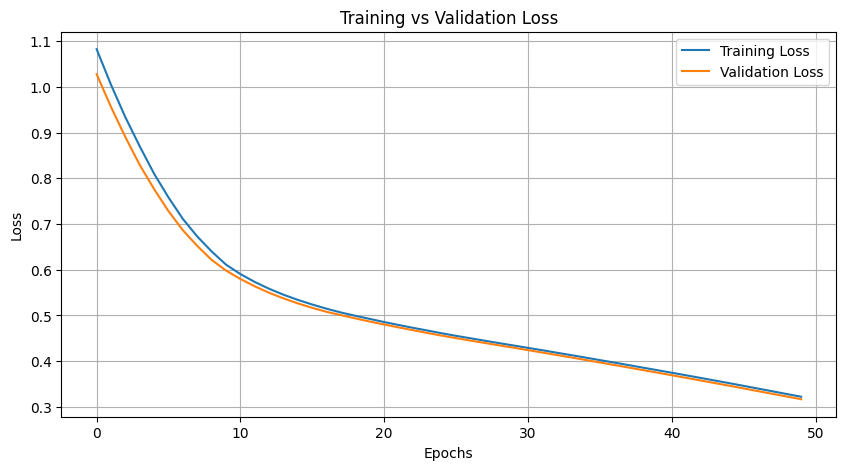

In [19]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=1, input_shape=(50,50,1), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=50))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1, shuffle=True)
plot_accuracy(history)
plot_loss(history)

Switching to a 3x3 kernel slightly reduces accuracy (e.g., ~85-88% vs. ~90% by epoch 50) and slows initial learning, though performance stabilizes later. A 3x3 kernel captures smaller local patterns, potentially missing broader stripe features that a 5x5 kernel can detect in 50x50 images. While still effective, the smaller receptive field requires more precise alignment with stripe segments, making it less robust for this task’s random stripe placements.